In [1]:
%matplotlib inline
from IPython.display import Image
%config InlineBackend.figure_format = 'svg'
# export slides with terminal command: 
# jupyter nbconvert run_haats.ipynb --to slides --post serve --reveal-prefix http://cdn.bootcss.com/reveal.js/3.3.0
# or export pdf using  
# jupyter nbconvert run_haats.ipynb --to pdf
#then type "ctrl-c" in terminal and then go to html location to re-open slides directly
import bs4
from import_data import *
from estimation import*
np.random.seed(222)
plt.close("all")
from matplotlib import rc
# import ipdb

['/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-e6e73dd0-2a57-4ce0-a712-d7958c68eb3f.json']
['/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-e6e73dd0-2a57-4ce0-a712-d7958c68eb3f.json']
['/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-e6e73dd0-2a57-4ce0-a712-d7958c68eb3f.json']


# On fancy  <font color='grey'>H</font><font color='blue'>A</font><font color='green'>²</font><font color='red'>T</font><font color='purple'>S</font>

![](/Users/serginio/GitHub/ssylvain/research/haats/output/figures/queen_hat.jpg)

### An introduction to <font color='grey'>H</font>idden-state <font color='blue'>A</font>rbitrage-free <font color='green'>A</font>ffine  <font color='red'>T</font>erm <font color='purple'>S</font>tructure (<font color='grey'>H</font><font color='blue'>A</font><font color='green'>A</font><font color='red'>T</font><font color='purple'>S</font>) models




#### Author: Serginio &#8220;Gino&#8221; Sylvain 
##### code: https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats

#### The US government issues both nominal bonds and inflation-linked bonds (Treasury Inflation Protected Securities; TIPS). 
#### Hence, or a given maturity, the latter tends to be more expensive $\Rightarrow$ lower yields


How do we know when to go long/short Break-Even’s (Nominal Bonds vs ILBs) ?



What is the market-implied inflation rate?



How can we extract the term premium from using a theoretical/structural model?



How can we forecast both nominal and ilb yields in consistent/theoretically robust manner?



How can we extract and forecast market implied discount rates which price these securities?




### We often use the Break-Even rate (BE = Nominal Yield - TIPS Yield) as an estimate of expected inflation

![](/Users/serginio/GitHub/ssylvain/research/haats/output/figures/fred_bkeven.jpg) 

For example: if Break-Evens (BE) come down quite a bit, what is that? Should we go long or short Break-evens (by trading ILB’s and short Nominal Bonds or using derivatives)?



But  wait…. BE = Exp. Inf. + IRP

* Perhaps shorting BE’s is more attractive if Exp. Inf. implied by BE’s is “too low”


* If instead, it is the IRP that is low (or negative) and dragging BE’s down, then it may be reflecting that investors  expect  future inflation to coincide with a period of higher income growth and/or that nominal yields are coming down sharply due to safe haven flows 


* In general, Exp. Inf. and IRP implied by BE  can help inform our investment decisions


## Theory




### <font color='grey'>H</font><font color='blue'>A</font><font color='green'>²</font><font color='red'>T</font><font color='purple'>S</font> ingredients 


#### The model replicates / is heavily inspired by the  series of papers by Christensen – Diebold – Lopez – Rudebusch (2007, 2010, 2013)

Suppose there several nominal bonds (*N*) and several inflation-linked ("real") bonds (*R*)


The no-arbitrage price of a zero-coupon bond with maturity $\tau$ is: 

\begin{eqnarray*}
P_{t}^{N}\{\tau\}&=&E_{t}\left[\frac{M_{t+\tau}^{N}}{M_{t}^{N}}\times1\right]=exp\left(-y_{t}^{N}\left\{ \tau\right\} \cdot\tau\right)\\&&\\P_{t}^{R}\{\tau\}&=&E_{t}\left[\frac{M_{t+\tau}^{R}}{M_{t}^{R}}\times1\right]=exp\left(-y_{t}^{R}\left\{ \tau\right\} \cdot\tau\right)
\end{eqnarray*} 

Here, $y_{t}^{N}$ and $y_{t}^{R}$ are the nominal and real yields respectively. 
$M_{t}^{N}$  and $M_{t}^{N}$ are the nominal and real state price densities.


The SPDs follow 

\begin{eqnarray*}
\frac{dM_{t}^{R}}{M_{t}^{R}}&=&-r_{t}^{R}dt-\Gamma_{t}\cdot dW_{t}\\&&\\\frac{dM_{t}^{N}}{M_{t}^{N}}&=&-r_{t}^{N}dt-\Gamma_{t}\cdot dW_{t}
\end{eqnarray*}

For what follows, to simplify the notation, let us suppress the *N*  and *R*  superscripts. 

The short rates and risk prices are assumed to be affined in the state variables. This is where we put the rabbit inside the hat...

\begin{eqnarray*}
r_{t}&=&\rho_{0}+\rho_{1}\cdot X_{t}
\\
\Gamma_{t}&=&\gamma_{0}+\gamma_{1}\cdot X_{t}
\end{eqnarray*}



\begin{eqnarray*}
P_{t}\{\tau\}&=&E_{t}^{Q}\left[exp\left(-\int_{t}^{t+\tau}r_{s}ds\right)\right]\\&&\\r_{t}&=&\rho_{0}+\rho_{1}\cdot X_{t} \\&&\\\Rightarrow P_{t}\{\tau\}&=&exp\left(B_{t}\left\{ \tau\right\} \cdot X_{t}+G_{t}\left\{ \tau\right\} \right)\\&&\text{Since }exp\left(-\int_{0}^{t}r_{s}ds\right)P_{t}\left\{ \tau\right\} \text{ is Martingale under }Q\text{, it's drift is zero.}\\&&\text{Thus, we allow for no arbitrage and }\\&&\text{ by using Ito's Lemman and setting }E_{t}^{Q}\left[\frac{dP_{t}\{\tau\}}{P_{t}\{\tau\}}\right]-r_{t}=0\\&&B_{t}\left\{ \tau\right\} \text{ and }G_{t}\left\{ \tau\right\} \text{ solve some ODEs.}\\&&\\y_{t}\{\tau\}&=&-\frac{1}{\tau}ln\left(P_{t}\{\tau\}\right)=-\frac{1}{\tau}B_{t}\left\{ \tau\right\} \cdot X_{t}-\frac{1}{\tau}G_{t}\left\{ \tau\right\} 
\end{eqnarray*}

Solving for B_{t} and G_{t} uniquely typically requires imposing some ad-hoc parameter values and other restrictions with little motivation.

Instead, following Christensen, Lopez, Rudebusch (2010) we assume a dynamic Nelson-Seigel (1987) model and impose level, slope and curvature restrictions by replacing the Nelson-Seigel (1987) parameters with the level, slope and curvature state variables. 


This is sensible since there is a lot of evidence that Level, Slope, and Curvature (e.g. from PCA) explain the cross-section of government bonds. Furthermore, the data we will use to fit the model will itself be smoothe yields data from Nelson-Seigel-Svennson-type models.

Hence, the second key assumption concerns the state variables:

\begin{eqnarray*}
X_{t}&=&\left(\begin{array}{c}
L_{t}^{N}\\
S_{t}\\
C_{t}\\
L_{t}^{R}
\end{array}\right)
\\
dX_{t}&=&K^{P}\left(\theta^{P}-X_{t}\right)dt+\Sigma dW_{t}
\end{eqnarray*}

This implies

\begin{eqnarray*}
y_{t}^{N}\{\tau\}	&=&	L_{t}^{N}+S_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}\right)+C_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}-e^{-\lambda\tau}\right)-\frac{G_{t}^{N}\left\{ \tau\right\} }{\tau}
\\
y_{t}^{R}\{\tau\}	&=&	L_{t}^{R}+\alpha^{R}S_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}\right)+\alpha^{R}C_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}-e^{-\lambda\tau}\right)-\frac{G_{t}^{R}\left\{ \tau\right\} }{\tau}
 \end{eqnarray*}

## Empirical approach

We observe the Nominal bond and ILB yields but the state variables (*X*) are hidden. We also need to estimate the model parameters.


First, we can re-write the key equations of the model...


Measurements: $$y_{t}=A_{0}+A_{1}X_{t}+\epsilon_{t} \qquad \text{with }\epsilon_{t}\sim N(0,\Phi)$$


States: $$X_{t}=U_0+U_1 X_{t_-1}+\eta_{t} \qquad \text{with } \eta_{t}\sim N(0,Q)$$

Since the Brownian Motion increments are Gaussian, Kalman-filtering is an efficient and consistent estimator.
It also allows for asynchronous variables (crucial: if we later include observed Macro variables as state variables).


We use the Kalman filter along with Expectation-Maximization (EM) algorithm to jointly extract the hidden states and estimate the model parameters.


Note that $y_t$ is both the input and the target.


EM Algorithm:

1. Start with a guess for the set of parameters, $\Omega$
 
2. Run the Kalman filter

3. Run the Kalman smoother

4. Compute the expected log-likelihood. This the lower bound to the log-likelihood
$\mathcal{L}\left\{ \Omega\right\}$
 and it is the objective function we will maximize 
 $$\mathcal{\tilde{L}}\left\{ \Omega\right\} 	=	E\left[ln\left(\left(\prod_{t=1}^{T}p\left(Y_{t}|X_{t},\Omega\right)\right)\left(\prod_{t=1}^{T}p\left(X_{t}|X_{t-1},\Omega\right)\right)\right)\bigg|X^{(T)}\right]$$ 

5. Solve for $\hat{\Omega}$
 $$\hat{\Omega}	=	arg\max_{\Omega}\mathcal{\tilde{L}}\left\{ \Omega\right\} $$

6. repeat steps 2-5 until change in $\hat{\Omega}$
  is below a pre-specified tolerance level

Bayesian EM Algorithm: replace steps 4. and 5. with 

* choosing priors for $\Omega$ and 


* sampling from posterior distribution  for $\Omega$
    
    

#### Data


Importing (Nelson Siegel smoothed/fitted) yield data for TIPS and Nominal bonds...

Data source:

http://www.federalreserve.gov/econresdata/researchdata/feds200628.xls

https://www.federalreserve.gov/econresdata/researchdata/feds200805.xls

In [2]:
# Import data from FED
tips_data, nominal_data = ImportData.importUS_Data(plots=1,save=1)

In [3]:
# The data is daily but let's focus of sub-sample of 5yrs with weekly frequency
tips_data, nominal_data = tips_data.loc['2010-01-01':'2015-11-23'], nominal_data.loc['2010-01-01':'2015-11-23']
tips_data, nominal_data = tips_data.asfreq('W', method='pad'), nominal_data.asfreq('W', method='pad')

In [4]:
#import seaborn as sns
import seaborn.apionly as sns #use sns.distplot but maintain the default matplotlib styling
sns.set("talk", font_scale=1, rc={"lines.linewidth": 1,"axes.labelcolor":'black',"text.color":'black'})

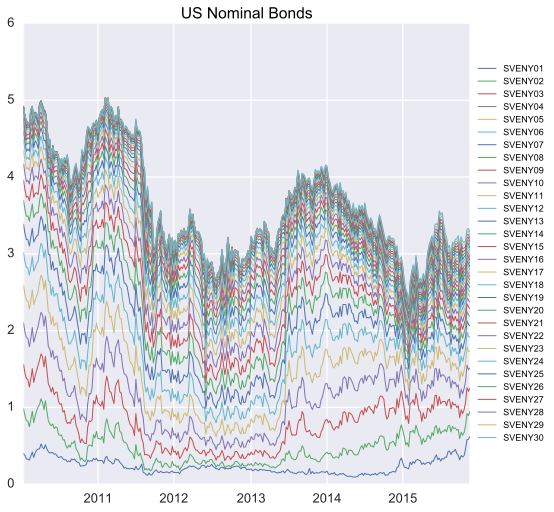

In [5]:
fig, ax = plt.subplots(1)
figures = {'fig1': fig, 'ax_fig1': ax}
nominal_data.plot(ax=figures['ax_fig1'],figsize=(8,8))
plt.legend(loc='center left',fontsize=9,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig1'].set_title('US Nominal Bonds')
plt.show()

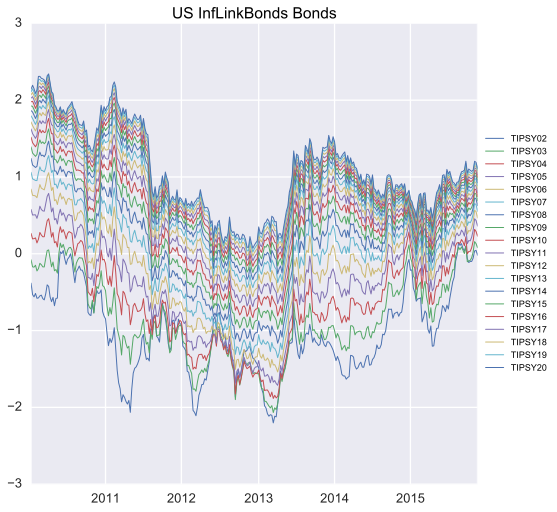

In [6]:
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
tips_data.plot(ax=figures['ax_fig2'],figsize=(8,8))
plt.legend(loc='center left',fontsize=9,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('US InfLinkBonds Bonds')
plt.axes.labelcolor='black'
plt.show()

In [7]:
nominal_data[['SVENY01','SVENY05','SVENY10','SVENY30']].rename(columns={i:str.replace(i,'SVENY','Nominals_y') 
                              for i in nominal_data.columns.values},inplace=False).describe()

,Nominals_y01,Nominals_y05,Nominals_y10,Nominals_y30
count,307.000000,307.000000,307.000000,307.000000
mean,0.235070,1.449393,2.605772,3.659419
std,0.100563,0.499565,0.666710,0.667156
min,0.091700,0.617300,1.478600,2.351800
25%,0.153950,0.943300,2.076400,3.152300
50%,0.207600,1.528400,2.495800,3.488700
75%,0.303600,1.732150,3.014850,4.141400
max,0.620900,2.719000,4.232500,5.035500


In [8]:
tips_data[['TIPSY02','TIPSY05','TIPSY10','TIPSY20']].rename(columns={i:str.replace(i,'TIPSY','TIPS_y') 
                              for i in tips_data.columns.values},inplace=False).describe()

,TIPS_y02,TIPS_y05,TIPS_y10,TIPS_y20
count,307.000000,307.000000,307.000000,307.000000
mean,-1.027746,-0.422153,0.402683,1.081772
std,0.544716,0.624938,0.634957,0.581638
min,-2.202000,-1.712700,-0.830400,0.071500
25%,-1.393600,-0.872350,-0.029900,0.662850
50%,-1.094200,-0.374700,0.511400,1.014200
75%,-0.640950,0.022200,0.808450,1.522850
max,0.147200,0.786100,1.761400,2.341600


There is a fair amout of correlation and auto-correlation. 


The model can handle this (does not blow up). 
But, we may want to be more careful about which bonds we choose to include

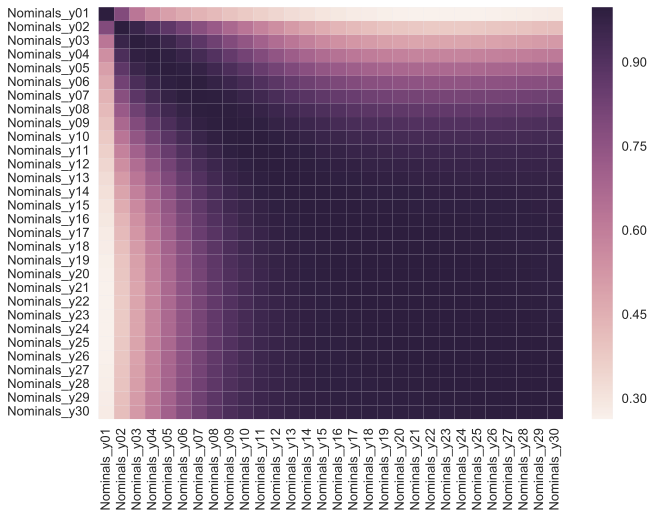

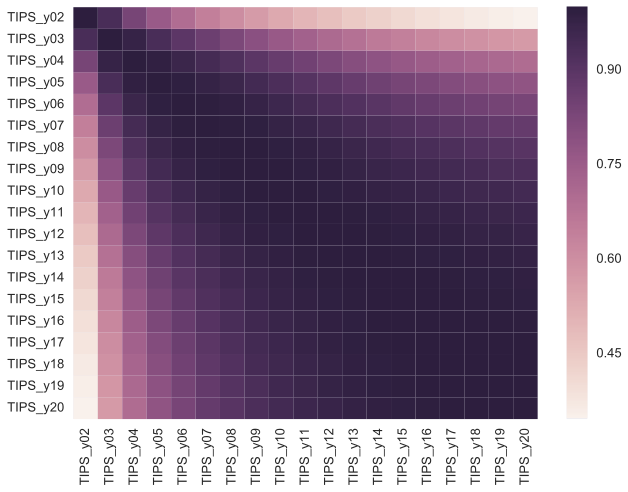

In [9]:

plt.rc('text', usetex=False)
sns.heatmap(
    nominal_data.rename(columns={i:str.replace(i,'SVENY','Nominals_y') 
                              for i in nominal_data.columns.values},inplace=False).corr()
)
plt.show()

plt.rc('text', usetex=False)
sns.heatmap(
    tips_data.rename(columns={i:str.replace(i,'TIPSY','TIPS_y') 
                              for i in tips_data.columns.values},inplace=False).corr()
)
plt.show()

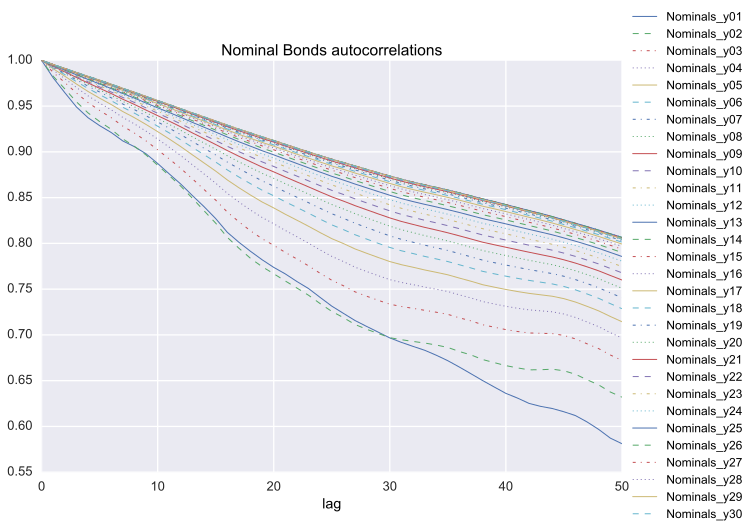

In [10]:
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
plt.figure()
for i in nominal_data.columns:
    plt.acorr(nominal_data[[i]].iloc[:,0],maxlags=50, usevlines=False, linestyle=next(linecycler),marker=None,label=str.replace(i,'SVENY','Nominals_y') )
    plt.xlim(0,50)
plt.title('Nominal Bonds autocorrelations') 
plt.xlabel('lag')
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
plt.show()

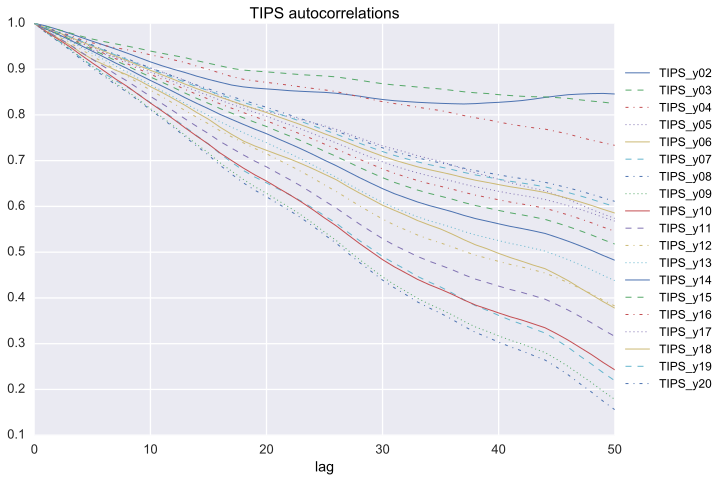

In [11]:
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
plt.figure()
for i in tips_data.columns:
    plt.acorr(tips_data[[i]].iloc[:,0],maxlags=50, usevlines=False, linestyle=next(linecycler),marker=None,label=str.replace(i,'TIPSY','TIPS_y') )
    plt.xlim(0,50)
plt.title('TIPS autocorrelations') 
plt.xlabel('lag')
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
plt.show()

## Running code...

In [2]:
start_time = time.time()

# The interveal between each rolling window: the gap by which the estimationd window shifts
# (e.g. with tgap = 1, rolling window is updated daily)
tgap = 30

# Rolling window: 0 if using expanding window, 1 if using rolling window
rolling = 0

#Rolling window size: size of rolling window (in years).. Use inf for full sample estimation
windowsize = np.inf;

np.set_printoptions(precision=32, suppress=True) #increase precision on  numeric values



################################################

# PRIMITIVES:
figures = []
# use allow_missing_data= 1 to extract ILB and Nominal dates where both are non-missing
allow_missing_data = 0

# set frequency of the data: daily, monthly, quarterly, yearly
estim_freq = 'weekly'

fix_Phi = 1     # "1" if you want to fix the volatility of observed yields using covar of historical data
                # "0" if you want to jointly estimate it with other model parameters
setdiag_Kp = 1  # "1" if you want to Kp to be diagonal so the state variables are assumed independent
                # "0" if you want to Kp to be unrestricted

# options for initializing the Kalman filter error variance:
#'steady_state' or 'unconditional' or 'identity' matrix
initV = 'unconditional'

# number of hidden state variables 4, or 6
num_states = 4

# Specify the maturities of data we want to use
US_ilbmaturities = np.array([2, 3,  5, 6, 8, 9, 10])
US_nominalmaturities = np.array([2, 3,  5, 6, 8, 9, 10])
US_maturities = np.hstack((US_nominalmaturities, US_ilbmaturities))

############################################################

# Set start and end dates for estimation
sdate, edate = '2010-01-01', '2015-11-23'#time.strftime("%Y-%m-%d") #'2010-01-01'
print("start date: %s" % sdate)
print("end date: %s" % edate)

# extract data for desired maturities and dates
tips_data, nominal_data = ImportData.importUS_Data(US_ilbmaturities, US_nominalmaturities,plots=0,save=1)
data = ImportData.extract_subset(tips_data, nominal_data, sdate, edate, allow_missing_data, estim_freq)


start date: 2010-01-01
end date: 2015-11-23


In [3]:
# Instantiate estimation object:

from IPython.core.debugger import Tracer; debug_here = Tracer() #this is the approach that works for ipython debugging

estimation1 =Rolling()

In [4]:
# Set up data, etc.:

estimation1.run_setup(data, US_ilbmaturities, US_nominalmaturities, \
                estim_freq=estim_freq, num_states=num_states,\
                fix_Phi=fix_Phi, setdiag_Kp=setdiag_Kp, initV=initV)

In [ ]:
# Do estimation. Here we use the EM Algorithm with MLE

# we will temporarily output optimization details in terminal
nb_stdout = sys.stdout
sys.stdout = open('/dev/stdout', 'wb') 

estimation1.fit('em_mle', tolerance=1e-4, maxiter=30 , toltype='max_abs', \
            solver_mle='Nelder-Mead',maxiter_mle=500, maxfev_mle=500, ftol_mle=0.0001, xtol_mle=0.0001)

sys.stdout = nb_stdout #reset output setting

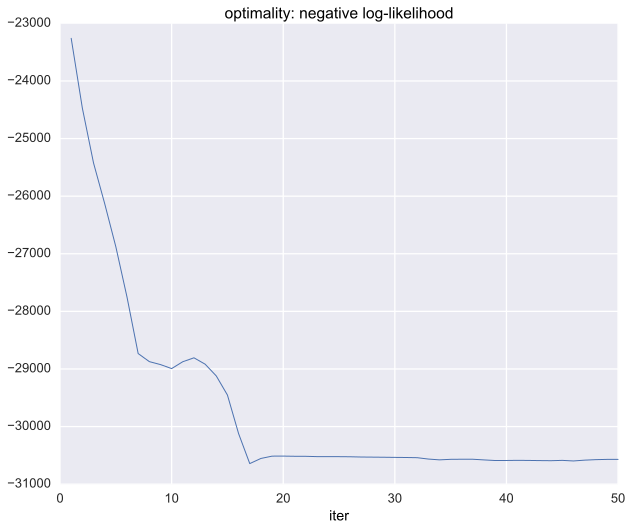

In [116]:
fig, ax = plt.subplots(1,figsize=(10,8))
estimation1.fit_path['objective'].plot(ax=ax)
# ax.title(label'optimality: negative log-likelihood')
plt.title('optimality: negative log-likelihood')
plt.show()

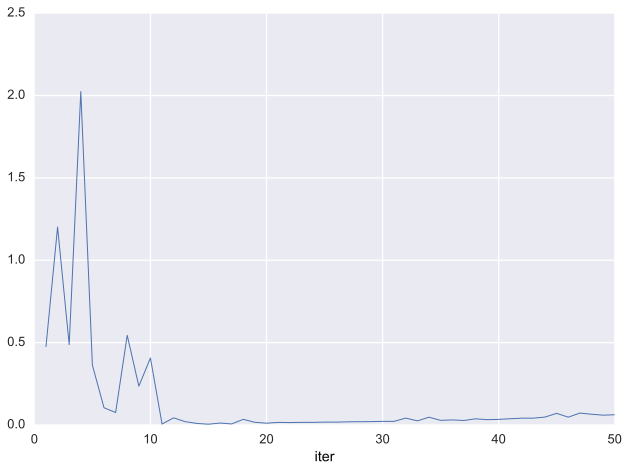

In [117]:
fig, ax = plt.subplots(1,figsize=(10,8))
estimation1.fit_path['criteria'].plot()
# ax.title(label'optimality: negative log-likelihood')
plt.title('tolerance: maximum absolute change in parameters')
plt.show()


### Examining some results

#### Model fit


We do a decent job at fitting some bond yields but a not so good job at fitting others.


This can be improved upon by having more flexible model (more parameters) and a more robust optimization method.

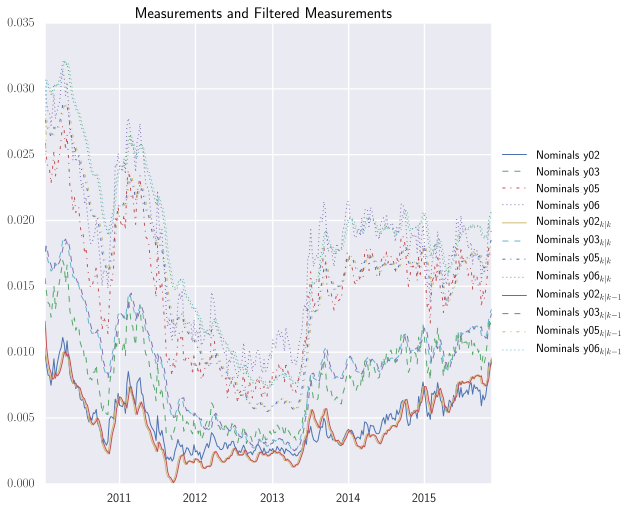

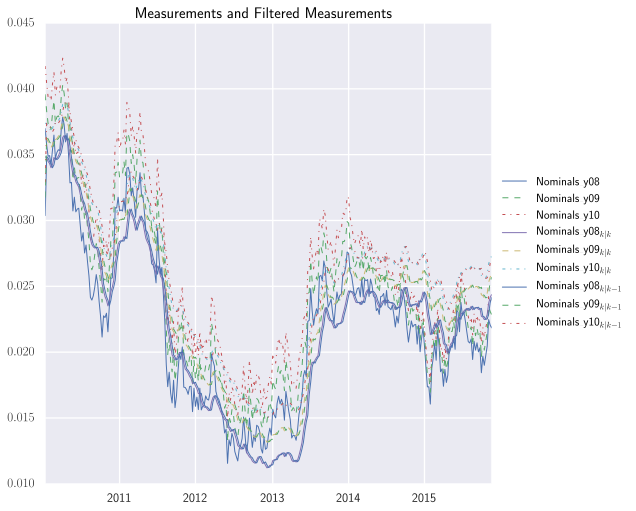

In [261]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [estimation1.Y.iloc[:,0:4].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') for i in estimation1.Y.columns.values},inplace=False),
    estimation1.Ytt_new.iloc[:,0:4].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') +'$_{k|k}$' for i in estimation1.Ytt_new.columns.values},inplace=False),
    estimation1.Yttl_new.iloc[:,0:4].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') +'$_{k|k-1}$' for i in estimation1.Yttl_new.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Measurements and Filtered Measurements')
plt.axes.labelcolor='black'
plt.show()


linestyles = ['-', '--', '-.','-', '--', '-.','-', '--', '-.','-', '--', '-.']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [estimation1.Y.iloc[:,4:7].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') for i in estimation1.Y.columns.values},inplace=False),
    estimation1.Ytt_new.iloc[:,4:7].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') +'$_{k|k}$' for i in estimation1.Ytt_new.columns.values},inplace=False),
    estimation1.Yttl_new.iloc[:,4:7].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') +'$_{k|k-1}$' for i in estimation1.Yttl_new.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Measurements and Filtered Measurements')
plt.axes.labelcolor='black'
plt.show()

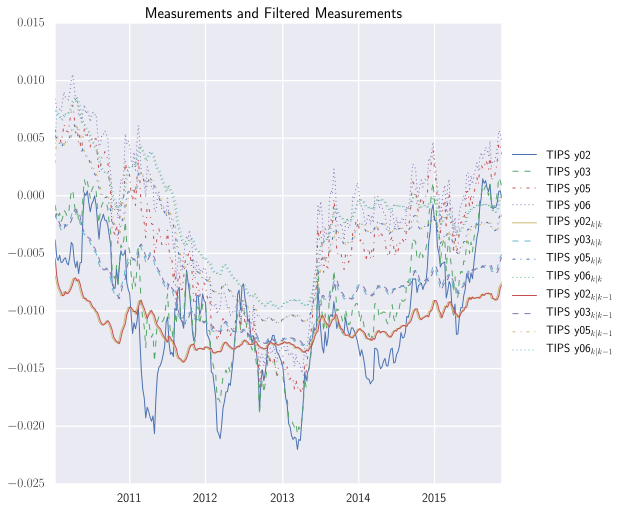

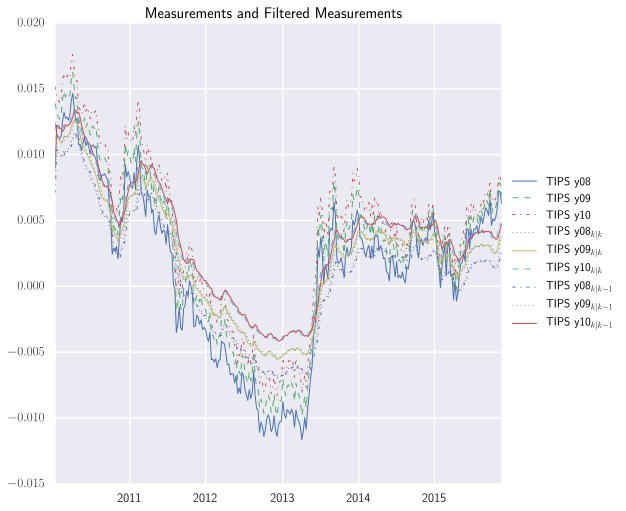

In [241]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [estimation1.Y.iloc[:,7:11].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') for i in estimation1.Y.columns.values},inplace=False),
    estimation1.Ytt_new.iloc[:,7:11].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') +'$_{k|k}$' for i in estimation1.Ytt_new.columns.values},inplace=False),
    estimation1.Yttl_new.iloc[:,7:11].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') +'$_{k|k-1}$' for i in estimation1.Yttl_new.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Measurements and Filtered Measurements')
plt.axes.labelcolor='black'
plt.show()


linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [estimation1.Y.iloc[:,11:].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') for i in estimation1.Y.columns.values},inplace=False),
    estimation1.Ytt_new.iloc[:,11:].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') +'$_{k|k}$' for i in estimation1.Ytt_new.columns.values},inplace=False),
    estimation1.Yttl_new.iloc[:,11:].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') +'$_{k|k-1}$' for i in estimation1.Yttl_new.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Measurements and Filtered Measurements')
plt.axes.labelcolor='black'
plt.show()

In [ ]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [estimation1.Y.iloc[:,0:4].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') for i in estimation1.Y.columns.values},inplace=False),
    estimation1.Ytt_new.iloc[:,0:4].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') +'$_{k|k}$' for i in estimation1.Ytt_new.columns.values},inplace=False),
    estimation1.Yttl_new.iloc[:,0:4].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') +'$_{k|k-1}$' for i in estimation1.Yttl_new.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('RMSE')
plt.axes.labelcolor='black'
plt.show()


linestyles = ['-', '--', '-.','-', '--', '-.','-', '--', '-.','-', '--', '-.']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [estimation1.Y.iloc[:,4:7].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') for i in estimation1.Y.columns.values},inplace=False),
    estimation1.Ytt_new.iloc[:,4:7].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') +'$_{k|k}$' for i in estimation1.Ytt_new.columns.values},inplace=False),
    estimation1.Yttl_new.iloc[:,4:7].rename(columns={i:str.replace(str.replace(i,'_','\_'),'SVENY','Nominals\_y') +'$_{k|k-1}$' for i in estimation1.Yttl_new.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('RMSE')
plt.axes.labelcolor='black'
plt.show()

In [ ]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [estimation1.Y.iloc[:,7:11].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') for i in estimation1.Y.columns.values},inplace=False),
    estimation1.Ytt_new.iloc[:,7:11].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') +'$_{k|k}$' for i in estimation1.Ytt_new.columns.values},inplace=False),
    estimation1.Yttl_new.iloc[:,7:11].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') +'$_{k|k-1}$' for i in estimation1.Yttl_new.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('RMSE')
plt.axes.labelcolor='black'
plt.show()


linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [estimation1.Y.iloc[:,11:].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') for i in estimation1.Y.columns.values},inplace=False),
    estimation1.Ytt_new.iloc[:,11:].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') +'$_{k|k}$' for i in estimation1.Ytt_new.columns.values},inplace=False),
    estimation1.Yttl_new.iloc[:,11:].rename(columns={i:str.replace(str.replace(i,'_','\_'),'TIPSY','TIPS\_y') +'$_{k|k-1}$' for i in estimation1.Yttl_new.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('RMSE')
plt.axes.labelcolor='black'
plt.show()

#### Implied States/Latent Variables

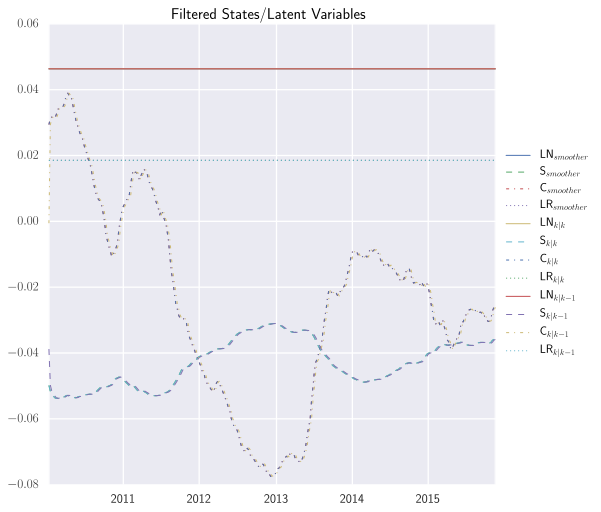

In [245]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']

plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [estimation1.XtT_new.rename(columns={i:i+'$_{smoother}$' for i in estimation1.Xtt_new.columns.values},inplace=False),
    estimation1.Xtt_new.rename(columns={i:i+'$_{k|k}$' for i in estimation1.Xtt_new.columns.values},inplace=False),
    estimation1.Xttl_new.rename(columns={i:i+'$_{k|k-1}$' for i in estimation1.Xttl_new.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Filtered States/Latent Variables')
plt.axes.labelcolor='black'
plt.show()

#### Implied Expected Inflation and Probability of Deflation

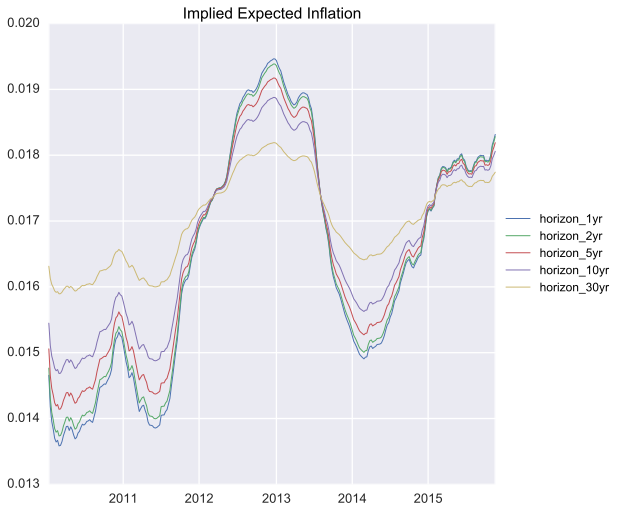

In [250]:
plt.rc('text', usetex=False)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
estimation1.exp_inf[['horizon_1yr','horizon_2yr','horizon_5yr','horizon_10yr','horizon_30yr']].plot(ax=figures['ax_fig2'],
                                                                                                    figsize=(8,8),linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Implied Expected Inflation')
plt.axes.labelcolor='black'
plt.show()

In [ ]:
plt.rc('text', usetex=False)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
estimation1.exp_inf[['horizon_1yr','horizon_2yr','horizon_5yr','horizon_10yr','horizon_30yr']].plot(ax=figures['ax_fig2'],
                                                                                                    figsize=(8,8),linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Implied Probability of Deflation')
plt.axes.labelcolor='black'
plt.show()

#### Forecasting (in-sample)


In the forecast below, we are &#8220;cheating&#8221 a bit because the parameters and filtered states are obtained for a full-sample fit. 


Instead what we should do is to use a rolling or expanding window to do the estimation and then forecast out of sample starting from the last date of the estimation window. 


Nonetheless, for now let us examine some in-sample forecasts

In [ ]:
fig, ax = sns.plt.subplots(1,figsize=(14,8))
line,=sns.plt.plot(forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].set_index(\
    forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].index.get_level_values('date')),linewidth=1.5\
    #,linestyle='solid', marker='o', markerfacecolor='blue', markersize=3.5
                  )
line.set_label('yield_5: actual')
for t in forecast.index.get_level_values('date').unique():
    line,=sns.plt.plot(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].set_index(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].index.get_level_values('horizon'))
        ,color='red',linewidth=0.5)
    fill=plt.fill_between(forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].index.get_level_values('horizon').values
                     , 
                     forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].values[:,0]-
                     forecast_std[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].values[:,0],
                     forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].values[:,0]+
                     forecast_std[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].values[:,0]
                    , facecolor='red', interpolate=True, alpha=.05
                    )
line.set_label('yield_5: forecasts')
fill.set_label('yield_5: forecasts stderr')
sns.plt.legend(loc='best')    
sns.plt.axes.labelcolor='black'
sns.plt.show()

In [ ]:
forecast_e, forecast_se, forecast_mse, forecast_rmse, forecast_mse_all, forecast_rmse_all = \
        kalman1.rmse(forecast)

In [ ]:
plt.rc('text', usetex=False)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
forecast_rmse.plot(ax=figures['ax_fig2'],figsize=(8,8),linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('RMSE')
plt.axes.labelcolor='black'
plt.show()

In [13]:
from IPython.core.debugger import Tracer; debug_here = Tracer() #this is the approach that works for ipython debugging

import estimation 
reload(estimation)
from estimation import *


# import estim_constraints 
# reload(estim_constraints)
# from estim_constraints import *

## Conclusion

### Take away

* This is a decent start...
    
    

* There is a lot more to be done...

### Lingering questions

* Why not use a simpler approach (like PCA) to extract the latent state variables?
    * **Answer**: because no arbritrage condition would be violated by such a model and if we would want to use such a model to identify arbitrage, we would be unable to do so because it would not be clear whether we ideed identify arbitrage opportunities of if the model's flaws drive the results. Furthermore, we would not be able to forecast future yields.
    
    

* Why not use VAR?
    * **Answer**: again, no arbritrage condition would be violated


## References

Detailed documentation/appendix can be found at https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats/haats_documentation.lyx
https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats/haats_documentation.pdf

My Python code and be forked from 
https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats